[*********************100%%**********************]  5 of 5 completed

Optimal weights:
SBIN.NS: 80.19%
TATAMOTORS.NS: 0.00%
TCS.NS: 9.22%
ITC.NS: 10.59%
RELIANCE.NS: 0.00%

Optimized Portfolio Performance:
Annual Return: 35.91%
Annual Volatility: 17.57%
Sharpe Ratio: 2.04


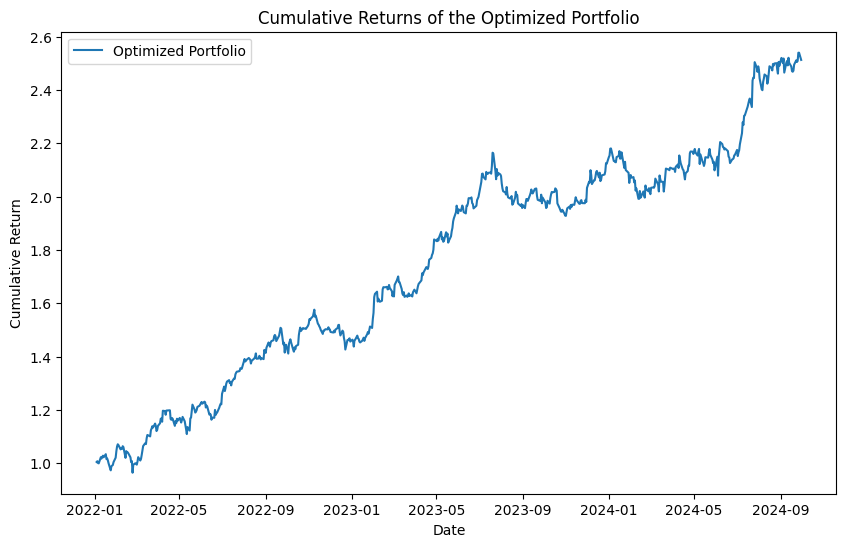

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Fetch historical data for a one-year period
tickers = ['SBIN.NS', 'TATAMOTORS.NS', 'TCS.NS', 'ITC.NS', 'RELIANCE.NS']
data = yf.download(tickers, start="2022-01-01", end="2024-10-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Portfolio optimization for maximum Sharpe ratio
def portfolio_performance(weights, returns):
    # Annualize return and volatility
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    return -sharpe_ratio  # Negative for minimization

# Set constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Sum of weights = 1
bounds = tuple((0, 1) for _ in range(len(tickers)))  # Each weight between 0 and 1
initial_weights = [1 / len(tickers)] * len(tickers)  # Start with equal weights

# Optimize for maximum Sharpe ratio
result = minimize(portfolio_performance, initial_weights, args=(returns,), method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

print("Optimal weights:")
for stock, weight in zip(tickers, optimal_weights):
    print(f"{stock}: {weight:.2%}")

# Calculate portfolio performance with optimal weights
annual_return = np.sum(returns.mean() * optimal_weights) * 252
annual_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(returns.cov() * 252, optimal_weights)))
sharpe_ratio = annual_return / annual_volatility

print("\nOptimized Portfolio Performance:")
print(f"Annual Return: {annual_return:.2%}")
print(f"Annual Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Backtest: Calculate cumulative returns of the optimized portfolio
portfolio_returns = returns.dot(optimal_weights)
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Optimized Portfolio")
plt.title("Cumulative Returns of the Optimized Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


In [22]:
import requests

# Example API URL
url = "http://127.0.0.1:8000/api/portopt/"
data = {'portfolio': ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]}

# Send POST request with JSON data using the json parameter
response = requests.post(url, json=data)
print(response.json())

{"port_metrics": "{\"columns\":[\"Ticker\",\"Volatility\",\"Beta\",\"VaR\"],\"index\":[0,1,2,3,4],\"data\":[[\"IOC\",0.3780535509,1.5515288783,-0.037593985],[\"GLENMARK\",0.3127786474,0.9138823296,-0.0239273531],[\"INFY\",0.2387106796,0.7154209548,-0.0206424008],[\"HDFCBANK\",0.2251401976,0.9847004529,-0.021446863],[\"ICICIBANK\",0.2149806474,0.989702656,-0.0171602962]]}", "correlation": [[1.0, 0.3097568279516646, 0.14594712350920347, 0.24854945325020872, 0.21840866705420184], [0.3097568279516646, 1.0, 0.16804117077879857, 0.23640460365762592, 0.1063752763194002], [0.14594712350920347, 0.16804117077879857, 1.0, 0.08400923795570141, 0.1658545516666428], [0.24854945325020872, 0.23640460365762592, 0.08400923795570141, 1.0, 0.4243861742672243], [0.21840866705420184, 0.1063752763194002, 0.1658545516666428, 0.4243861742672243, 1.0]], "optimization_result": {"weights": "{\"columns\":[0,1,2,3,4],\"index\":[\"Scrips\",\"Optimized Weights\"],\"data\":[[\"IOC\",\"GLENMARK\",\"INFY\",\"HDFCBANK\",

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'RELIANCE.NS':                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01   693.978516   698.138733   688.263977   690.138306   678.021423   
2020-01-02   691.235535   704.470520   691.235535   701.887512   689.564270   
2020-01-03   700.835999   704.790527   696.264343   702.733276   690.395264   
2020-01-06   694.892883   698.504456   684.835205   686.435303   674.383423   
2020-01-07   694.435669   701.521790   691.921265   696.995850   684.758545   
...                 ...          ...          ...          ...          ...   
2022-12-26  1160.556763  1173.132568  1150.242188  1164.848633  1156.822021   
2022-12-27  1167.594604  1176.270752  1160.787476  1174.378662  1166.286499   
2022-12-28  1171.286621  1176.732300  1163.671875  1174.263306  1166.171875   
2022-12-29  1166.210083  1176.316895  1165.517822  1173.732544  1165.644775   
2022-12-30  1174.563232  1189.285034

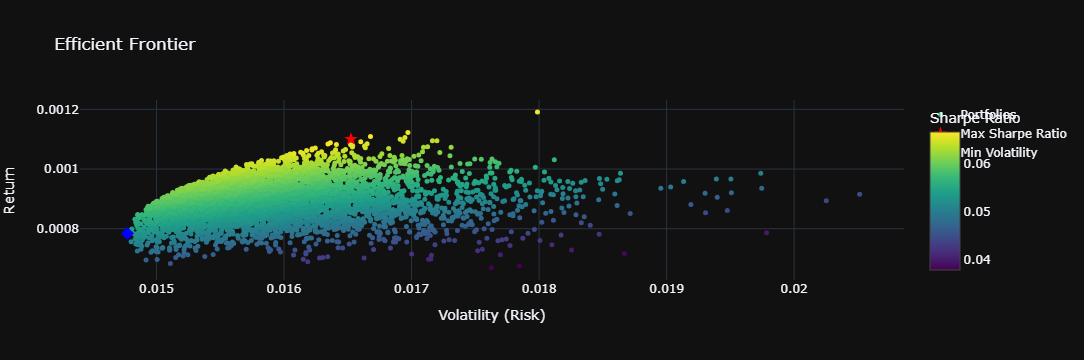

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go


def efficient_frontier():
    
    
    # Fetch stock data for a group of Indian stocks
    tickers = ["RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS"]
    # tickers = [ 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'AMBUJACEM.NS', 'ARVINDFASN.NS', 'ASHOKLEY.NS', 'ATUL.NS', 'BAJFINANCE.NS', 'BEL.NS', 'BRITANNIA.NS', 'CDSL.NS', 'COALINDIA.NS', 'DLF.NS', 'EXIDEIND.NS', 'GLENMARK.NS',
    #            'GODREJPROP.NS', 'HAL.NS', 'HAPPSTMNDS.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'INDHOTEL.NS', 'INFY.NS','IOC.NS', 'ITC.NS', 'JYOTHYLAB.NS', 'KPITTECH.NS',
    #            'M&M.NS', 'MTARTECH.NS', 'NATIONALUM.NS', 'NMDC.NS',  'NTPC.NS', 'PFC.NS', 'POWERGRID.NS', 'RECLTD.NS', 'SBIN.NS', 'TATAELXSI.NS', 'TATAMOTORS.NS',
    #            'TATAPOWER.NS', 'TATASTEEL.NS', 'TCS.NS', 'VBL.NS', 'VEDL.NS', 'ZEEL.NS', 'ZOMATO.NS'] 

    stock_data = {ticker: yf.download(ticker, start="2020-01-01", end="2023-01-01") for ticker in tickers}
    print(stock_data)
    # Adjust closing prices
    adjusted_close = {ticker: data["Adj Close"] for ticker, data in stock_data.items()}
    prices_df = pd.DataFrame(adjusted_close)
    
    # Calculate daily returns
    daily_returns = prices_df.pct_change().dropna()


    # Mean returns and covariance matrix
    mean_returns = daily_returns.mean()
    cov_matrix = daily_returns.cov()
    
    # Simulate random portfolios
    num_portfolios = 5000
    results = np.zeros((3, num_portfolios))  # Rows for return, volatility, Sharpe ratio
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)  # Normalize to sum to 1
        weights_record.append(weights)
        
        # Portfolio return and volatility
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = portfolio_return / portfolio_volatility
    
        # Store the results
        results[0, i] = portfolio_return
        results[1, i] = portfolio_volatility
        results[2, i] = sharpe_ratio
    
    # Convert results to a DataFrame for easier manipulation
    portfolio_results_df = pd.DataFrame({
        "Return": results[0],
        "Volatility": results[1],
        "Sharpe Ratio": results[2],
        "Weights": weights_record
    })


    # Find the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = portfolio_results_df["Sharpe Ratio"].idxmax()
    max_sharpe_portfolio = portfolio_results_df.iloc[max_sharpe_idx]
    print('max_sharpe_idx',max_sharpe_idx)
    print('max_sharpe_portfolio\n',max_sharpe_portfolio)    
    # Find the portfolio with the minimum volatility
    min_vol_idx = portfolio_results_df["Volatility"].idxmin()
    min_vol_portfolio = portfolio_results_df.iloc[min_vol_idx]
    print('min_vol_idx',min_vol_idx)
    print('min_vol_portfolio\n',min_vol_portfolio)    
    # Plot the Efficient Frontier
    fig = go.Figure()
    
    # Add scatter plot for all portfolios
    fig.add_trace(go.Scatter(
        x=portfolio_results_df["Volatility"],
        y=portfolio_results_df["Return"],
        mode="markers",
        marker=dict(
            size=5,
            color=portfolio_results_df["Sharpe Ratio"],
            colorscale="Viridis",
            colorbar=dict(title="Sharpe Ratio"),
            showscale=True,
        ),
        name="Portfolios",
    ))
    
    # Highlight maximum Sharpe ratio portfolio
    fig.add_trace(go.Scatter(
        x=[max_sharpe_portfolio["Volatility"]],
        y=[max_sharpe_portfolio["Return"]],
        mode="markers",
        marker=dict(color="red", size=10, symbol="star"),
        name="Max Sharpe Ratio",
    ))
    
    # Highlight minimum volatility portfolio
    fig.add_trace(go.Scatter(
        x=[min_vol_portfolio["Volatility"]],
        y=[min_vol_portfolio["Return"]],
        mode="markers",
        marker=dict(color="blue", size=10, symbol="diamond"),
        name="Min Volatility",
    ))
    
    # Add layout details
    fig.update_layout(
        title="Efficient Frontier",
        xaxis_title="Volatility (Risk)",
        yaxis_title="Return",
        showlegend=True,
        template="plotly_dark"
    )
    
    fig.show()

efficient_frontier()

In [21]:
import mrigutilities as mu
import datetime

ed = datetime.date.today()
sd = ed - datetime.timedelta(days=365)  
s = mu.getStockData('NIFTY 50',sd,ed)
s


F:\Mrig Analytics\mrigAnalytics\mrigutilities.py:348: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,symbol,series,prev_close,open,high,low,last,close,vwap,volume,...,trades,deliverable_volume,per_deliverable_volume,pe,pb,div_yield,close_adj,volume_adj,nse_vol,index_members
date,,,,,,,,,,,,,,,,,,,,,
2023-11-28,NIFTY 50,IN,None,19844.65,19916.85,19800.00,None,19889.70,None,229595031.0,...,None,None,None,21.26,3.49,1.37,19889.70,None,None,None
2023-11-29,NIFTY 50,IN,None,19976.55,20104.65,19956.30,None,20096.60,None,236241768.0,...,None,None,None,21.48,3.52,1.36,20096.60,None,None,None
2023-11-30,NIFTY 50,IN,None,20108.50,20158.70,20015.85,None,20133.15,None,486585349.0,...,None,None,None,21.52,3.53,1.35,20133.15,None,None,None
2023-12-01,NIFTY 50,IN,None,20194.10,20291.55,20183.70,None,20267.90,None,265812566.0,...,None,None,None,21.66,3.55,1.34,20267.90,None,None,None
2023-12-04,NIFTY 50,IN,None,20601.95,20702.65,20507.75,None,20686.80,None,381107418.0,...,None,None,None,22.11,3.63,1.32,20686.80,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-18,NIFTY 50,IN,None,23605.30,23606.80,23350.40,None,23453.80,None,263311912.0,...,None,None,None,21.57,3.51,1.33,23453.80,None,None,"['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIA..."
2024-11-19,NIFTY 50,IN,None,23529.55,23780.65,23464.80,None,23518.50,None,297477279.0,...,None,None,None,21.65,3.52,1.36,23518.50,None,None,"['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIA..."
2024-11-21,NIFTY 50,IN,None,23488.45,23507.30,23263.15,None,23349.90,None,420332354.0,...,None,None,None,21.49,3.50,1.31,23349.90,None,None,"['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIA..."
